Math 215 - Homework 5 - Due Friday November 8 by 11:59 pm

Three problems:
1.  (20 points)  Write some functions inside the Polynomial Class
2.  (10 points)  Read a large data file and create a graphical representation and do some analysis
3.  (10 points)  Implement newton's method for finding the root of a function and make a graph showing the results.  Compare with the results of scipy.optimize.newton.

1.  (20 points)  Compete the implementation of our Polynomial class by implementing these four instance methods:

```
__mul__(self, other)
scalar_mult(self, c)
degree(self)
derivative(self)
```
You will need to add to the existing code in the class Polynomial to implement these methods.  Do NOT change the existing code in the class.

The next cells provide testing code for your methods.  You may want to add more testing code - but do not modify the existing testing code.

Extra credit:  
Write a function `__eq__` for the Polynomial class to define what it means for two polynomilas to be equal.  Include testing code for your function.




In [18]:
import math
class Polynomial:
  def __init__(self, terms = []):
    self.coeff = {}  # Keys = exponents, values = coefficients
    for a,n in terms:
      if a != 0:
        self.coeff[n] = a

  def add_term(self, n, a):
    # add the term a*x^n to self
    # This modifies self and does not return anything
    self.coeff[n] = self.coeff.get(n, 0) + a
    if self.coeff[n] == 0:
      del self.coeff[n]

  def copy(self):
    # Create and return  a copy of self
    # Do NOT modify self
    answer = Polynomial()
    answer.coeff = self.coeff.copy()
    return answer

  def __add__(self, other):
    # Create and return a new Polynomial which is the sum of self and other
    # Do not modify self and do not modify other
    answer = self.copy()
    for n, a in other.coeff.items():
      answer.add_term(n, a)
    return answer

  def __str__(self):
    #  Return a string representation of self
    # Do NOT modify self
    if len(self.coeff) == 0:
      return '0'
    else:
      list_rep = [f'{a:.2f} x^{n}' for (n, a) in sorted(self.coeff.items(), reverse = True) if n > 0 ]
      if 0 in self.coeff:
        list_rep.append(f'{self.coeff[0]:.2f}')
      return ' + '.join(list_rep)

  def __call__(self, x):
    # Evaluate self on the input x, returning a numeric value
    # Do NOT modify self
    answer = 0
    return answer + sum([a*math.pow(x, n) for n, a in self.coeff.items()])  # corrected Oct 31, 2024.  reversed the order of n, a

  #  HW5:  Implement the following four functions for the Polynomial class
  def degree(self):
    return max(self.coeff.keys()) # locates largest coefficient value among keys and returns

  def scalar_mult(self, c):
    if c == 0:
      return Polynomial() # impt note here not return self but to return Polynomial()
      # returning this calls the Polynomial constructor, "creating" a new polynomial with an empty coeff.dictionary, representing the zero polynomial
    return Polynomial([(coefficient * c, exponent) for exponent, coefficient in self.coeff.items()])
    # applies c-scalar regularly for non-zero scalars

  def __mul__(self, other):
    product = Polynomial() # new (empty) poly obj
    for expo_1, coef_1 in self.coeff.items():
      for expo_2, coef_2 in other.coeff.items():
        product.add_term(expo_1 + expo_2, coef_1 * coef_2) # basicallly iterates through first poly and multiplies coeffs and adds expos for matching term
        # assumes polynomials in correct, degree-descending order for operating on correct terms but i dont think it should matter (commutativity of multiplication after all)
    return product

  def derivative(self):
    deriv_terms = []  # empty list for derived terms

    for expo, coef in self.coeff.items():
        if expo > 0: # ensures that constants don't get derived, just exempt from result
            deriv_terms.append((expo * coef, expo - 1))

    return Polynomial(deriv_terms) # applies list of derivations to poly obj for format

Testing code for degree()

In [5]:
p = Polynomial([(2**k, k) for k in range(5)])
p = p + Polynomial([(-16, 4), (-2, 5)])
print(f'{p} has degree {p.degree()}')  # degree is 5
p0 = Polynomial()
print(f'{p0} has degree {p0.degree()}')  # degree is 0

-2.00 x^5 + 8.00 x^3 + 4.00 x^2 + 2.00 x^1 + 1.00 has degree 5
0 has degree 0


Testing code for scalar_mult

In [9]:
p = Polynomial([(2**k, k) for k in range(5)])
q = p.scalar_mult(-3)
print(f'p = {p} and q = {q}')
# Expected Output: p = 16.00 x^4 + 8.00 x^3 + 4.00 x^2 + 2.00 x^1 + 1.00 and q = -48.00 x^4 + -24.00 x^3 + -12.00 x^2 + -6.00 x^1 + -3.00
r = q.scalar_mult(0)
print(f'q = {q} and r = {r}')
# Expected Output: q = -48.00 x^4 + -24.00 x^3 + -12.00 x^2 + -6.00 x^1 + -3.00 and r = 0

p = 16.00 x^4 + 8.00 x^3 + 4.00 x^2 + 2.00 x^1 + 1.00 and q = -48.00 x^4 + -24.00 x^3 + -12.00 x^2 + -6.00 x^1 + -3.00
q = -48.00 x^4 + -24.00 x^3 + -12.00 x^2 + -6.00 x^1 + -3.00 and r = 0


Testing Code for `__mul__`





In [11]:
p = Polynomial([(1, 1), (5, 0)])
q = Polynomial([(1, 2), (16, 1), (3, 0)])
print(f'p * q = {p * q} and q * p = {q * p}')
print(f'p * p = {p * p}')
print(f'p = {p} and q = {q}')
z = Polynomial()
print(f'p * z = {p * z} and z + p = {z * p}')

# Expected output:
'''
p * q = 1.00 x^3 + 21.00 x^2 + 83.00 x^1 + 15.00 and q * p = 1.00 x^3 + 21.00 x^2 + 83.00 x^1 + 15.00
p * p = 1.00 x^2 + 10.00 x^1 + 25.00
p = 1.00 x^1 + 5.00 and q = 1.00 x^2 + 16.00 x^1 + 3.00
p * z = 0 and z + p = 0

'''

p * q = 1.00 x^3 + 21.00 x^2 + 83.00 x^1 + 15.00 and q * p = 1.00 x^3 + 21.00 x^2 + 83.00 x^1 + 15.00
p * p = 1.00 x^2 + 10.00 x^1 + 25.00
p = 1.00 x^1 + 5.00 and q = 1.00 x^2 + 16.00 x^1 + 3.00
p * z = 0 and z + p = 0


'\np * q = 1.00 x^3 + 21.00 x^2 + 83.00 x^1 + 15.00 and q * p = 1.00 x^3 + 21.00 x^2 + 83.00 x^1 + 15.00\np * p = 1.00 x^2 + 10.00 x^1 + 25.00\np = 1.00 x^1 + 5.00 and q = 1.00 x^2 + 16.00 x^1 + 3.00\np * z = 0 and z + p = 0\n\n'

Testing code for derivative

In [19]:
p = Polynomial([(1, 1), (5, 0)])
q = Polynomial([(1, 2), (16, 1), (3, 0)])
r = Polynomial()
s = Polynomial([(25, 1)])
t = Polynomial([(-3, 0)])
print(f'p.derivative() = {p.derivative()} and q.derivative() = {q.derivative()}')
print(f'p = {p} and q = {q}')
print(f'r.derivative() = {r.derivative()} and s.derivative() = {s.derivative()} and t.derivative() = {t.derivative()}')
print(f'r = {r} and s = {s} and t = {t}')

# Expected output:
'''
p.derivative() = 1.00 and q.derivative() = 2.00 x^1 + 16.00
p = 1.00 x^1 + 5.00 and q = 1.00 x^2 + 16.00 x^1 + 3.00
r.derivative() = 0 and s.derivative() = 25.00 and t.derivative() = 0
r = 0 and s = 25.00 x^1 and t = -3.00
'''

p.derivative() = 1.00 and q.derivative() = 2.00 x^1 + 16.00
p = 1.00 x^1 + 5.00 and q = 1.00 x^2 + 16.00 x^1 + 3.00
r.derivative() = 0 and s.derivative() = 25.00 and t.derivative() = 0
r = 0 and s = 25.00 x^1 and t = -3.00


'\np.derivative() = 1.00 and q.derivative() = 2.00 x^1 + 16.00\np = 1.00 x^1 + 5.00 and q = 1.00 x^2 + 16.00 x^1 + 3.00\nr.derivative() = 0 and s.derivative() = 25.00 and t.derivative() = 0\nr = 0 and s = 25.00 x^1 and t = -3.00\n'

2. (10 points)  Visit  https://data.cityofchicago.org/browse?category=Transportation, the  City of Chicago data portal and download the data file for CTA ridership - daily boarding totals as a CSV file.  
Read in the file and create a graph of the following:
Sunday bus boardings by day
and
SunRail boardings by day.
The days should be on the horizontal axis and the bus and rail riderships should be graphed as line plots.  
Be sure to include:  line plots of the data (two lines), a legend, a title, proper labels on the horizontal and vertical axes.

You will need to use numpy and matplotlib.  You may choose to use the csv module or to use pandas.


<ipython-input-54-dcccdf19077f>:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "p--" (-> marker='p'). The keyword argument will take precedence.
  plt.plot(dates, rail_boardings, 'p--', marker='x', markersize=5, label='Rail Boardings', linewidth=1.2)


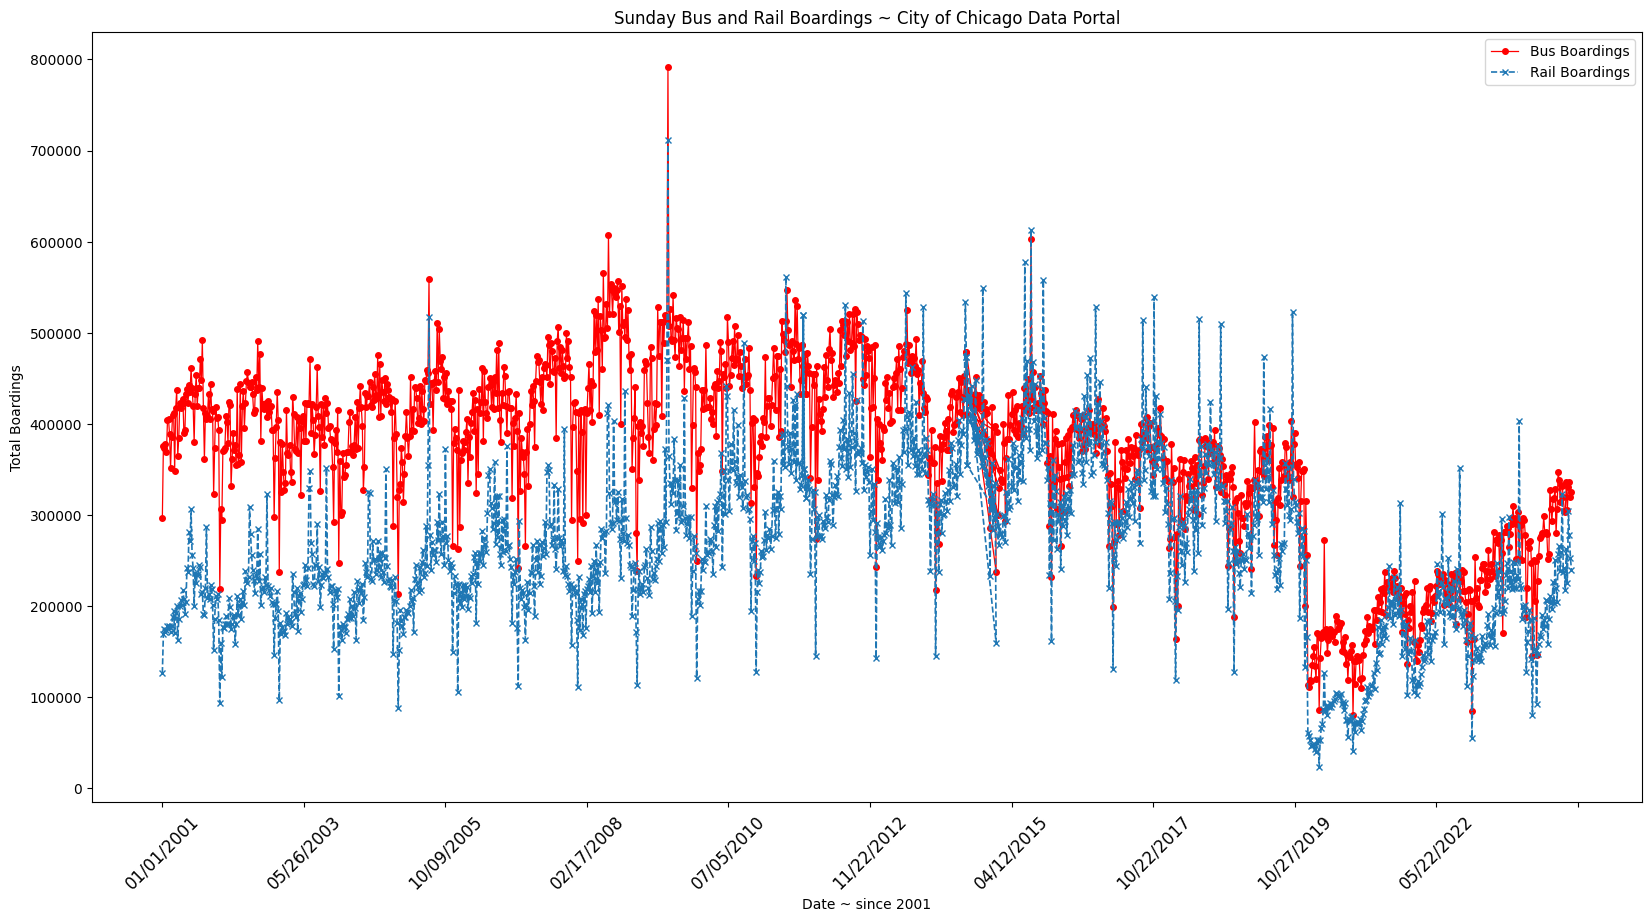

In [54]:
import csv
import numpy as np
import matplotlib.pyplot as plt

rail_boardings = []
dates = []
bus_boardings = []

with open('CTA_Ridership_BoardingTotals.csv', 'r') as input_file:
    reader = csv.DictReader(input_file)
    for row in reader:
        if row['day_type'] == 'U': # parsing only for sunday ridership
            dates.append(row['service_date'])
            bus_boardings.append(int(row['bus']))
            rail_boardings.append(int(row['rail_boardings'])) # int typecasts just in case

rail_boardings = np.array(rail_boardings)
dates = np.array(dates)
bus_boardings = np.array(bus_boardings)
# converting to np arrays

plt.figure(figsize=(20, 10))
plt.plot(dates, bus_boardings, 'r-', marker='o', markersize=4, label='Bus Boardings', linewidth=0.9)
plt.plot(dates, rail_boardings, 'p--', marker='x', markersize=5, label='Rail Boardings', linewidth=1.2)
# dates = x-axis, r- and p-- coloring encodings
# second arg for plt.plot y-axis values for both bus and rail data
# labels indicate info for legend, line width arg for line thickness on graph

plt.title('Sunday Bus and Rail Boardings ~ City of Chicago Data Portal')
plt.xlabel('Date ~ since 2001')
plt.ylabel('Total Boardings')

plt.xticks(np.arange(0, len(dates), step=len(dates) // 10), rotation=45, fontsize=12)
# x-axis formatting above: problem was that showing all of the days for the past 24 years was too cumbersome without shrinking each date's font to
# a miniscule size
# solved by first creating array of indices from dates numpy array by dividing total number of dates by 10, basically giving every 10th date, allowing roughly regular
# intervals on x-axis. The rotation argument physically rotates the print of the dates so that they don't overlap

plt.legend()
plt.show()


3.  (10 points) Newtons method.  Read about Newton's method for finding the root of a function.   https://en.wikipedia.org/wiki/Newton%27s_method

A.  Write your own function newton1 to implement Newton's method for approximation a value x such that f(x) == 0. Use the function header and specifications given below.

B.  Create an interesting function, g(x), that has a positive real root.  Apply your newton1 function to fund a root and then make a plot of the function g(x) and annotate the plot by labelling the root that you found.

C.  Repeat part B, but this time use the built in newton's method function from scipy.optimize.

In [ ]:
# Your solution for problem 3A goes here
# Use the provided function header

def newton1(func, x0, fprime, maxiter, tol):
  #  Implement newton's method to find an approximate x-value where func(x) == 0
  #  func is the function you are finding a root for
  #  x0 is an initial guess at the root
  #  fprime is a function, it is the derivative of func
  #  maxiter is the maximum number of iterations for the method
  #  tol is the tolerance for error.  You should find an x so that |func(x)| < tol
  #  Return value:  a three tuple  (root, success, iterations), where
  #              root is the x value you found with func(x) approximately = 0
  #              success is a boolean value indicating if an acceptable root was found
  #              iterations is an int telling how many steps of Newton's method we used

Some testing code for problem 3A

In [ ]:
def f(x):
  return x**3 - 2*x**2 - 5*np.exp(-1*x)

def fprime(x):
  return 3*x**2 - 4*x**1 + 5*np.exp(-1*x)

root, success, steps = newton1(f, 3, fprime, 100, 0.0001)
print(f'root = {root:.5f} and f(root) = {f(root):.5f} and it took {steps} steps')

#  Expected output:
'''
root = 2.13077 and f(root) = 0.00001 and it took 4 steps
'''


In [ ]:
# Your code for problem 3B goes here



In [ ]:
import scipy as sp
scipy.optimize.newton?

In [ ]:
root = sp.optimize.newton(f, 3, fprime, tol = 0.0001, maxiter = 50)
print(root)
print(f'root = {root:.5f} and f(root) = {f(root):.5f}')


In [ ]:
# Your code for problem 3C goes here



Extra testing code for newton's method applied to Polynomials.  This will only work if you have completed exercise 1 correctly.

In [ ]:
p1 = Polynomial([(1, 1), (-6, 0)])
p2 = p1 * p1
p3 = p2 * Polynomial([(1, 1), (-3, 0)])
p4 = p3 + Polynomial([(-2, 0)])
print(p4)
root1 = newton1(p4, 3, p4.derivative(), 100, 0.0001)
print(root1)
print(f'root = {root1[0]:.5f} and f(root) = {p4(root1[0]):.5f}')

root2 = newton1(p4, 4.5, p4.derivative(), 100, 0.0001)
print(root2)
print(f'root = {root2[0]:.5f} and f(root) = {p4(root2[0]):.5f}')

root3 = newton1(p4, 6, p4.derivative(), 100, 0.0001)
print(root3)
print(f'root = {root3[0]:.5f} and f(root) = {p4(root3[0]):.5f}')

root4 = newton1(p4, 7, p4.derivative(), 100, 0.0001)
print(root4)
print(f'root = {root4[0]:.5f} and f(root) = {p4(root4[0]):.5f}')

root5 = newton1(p4, 20, p4.derivative(), 100, 0.0001)
print(root5)
print(f'root = {root5[0]:.5f} and f(root) = {p4(root5[0]):.5f}')

#  Expected output:
'''
1.00 x^3 + -15.00 x^2 + 72.00 x^1 + -110.00
(3.267946678269624, True, 3)
root = 3.26795 and f(root) = -0.00002
(5.000000000529242, True, 3)
root = 5.00000 and f(root) = -0.00000
(6, False, 0)
root = 6.00000 and f(root) = -2.00000
(6.732053321730375, True, 3)
root = 6.73205 and f(root) = 0.00002
(6.732051079980321, True, 9)
root = 6.73205 and f(root) = 0.00000
'''